In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [20]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [21]:
def create_dataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [22]:
train_paths, train_labels = create_dataframe(TRAIN_DIR)
train_df = pd.DataFrame({'image': train_paths, 'label': train_labels})
test_paths, test_labels = create_dataframe(TEST_DIR)
test_df = pd.DataFrame({'image': test_paths, 'label': test_labels})

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [23]:
def extract_features(images):
    features = []
    for image_path in tqdm(images):
        img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
        img_array = img_to_array(img)
        features.append(img_array)
    features = np.array(features)
    return features

In [24]:
x_train = extract_features(train_df['image']) / 255.0
x_test = extract_features(test_df['image']) / 255.0

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = to_categorical(label_encoder.fit_transform(train_df['label']))
y_test = to_categorical(label_encoder.transform(test_df['label']))

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

C:\Users\bsumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
optimizer = RMSprop(learning_rate=0.001)

In [29]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 76s 327ms/step - accuracy: 0.2320 - loss: 1.8366 - val_accuracy: 0.2965 - val_loss: 1.7301
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 74s 327ms/step - accuracy: 0.3388 - loss: 1.6763 - val_accuracy: 0.3356 - val_loss: 1.7059
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 73s 321ms/step - accuracy: 0.3947 - loss: 1.5568 - val_accuracy: 0.3927 - val_loss: 1.5439
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 73s 324ms/step - accuracy: 0.4365 - loss: 1.4612 - val_accuracy: 0.4829 - val_loss: 1.3649
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 72s 318ms/step - accuracy: 0.4712 - loss: 1.3857 - val_accuracy: 0.5034 - val_loss: 1.2933
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 31s 136ms/step - accuracy: 0.4937 - loss: 1.3225 - val_accuracy: 0.4956 - val_loss: 1.2914
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.5088 - loss: 1.2877 - val_accuracy: 0.5175 - val_loss: 1.2785
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.5325 - l

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)

221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5509 - loss: 1.4947


In [32]:
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
model.save("emotion_detector_model3_rmsprop.h5")

Test Loss: 1.2676342725753784
Test Accuracy: 0.6231248378753662


In [34]:
from tensorflow.keras.models import load_model
loaded_model = load_model("emotion_detector_model3_rmsprop.h5")

In [35]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [36]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
model prediction is  neutral


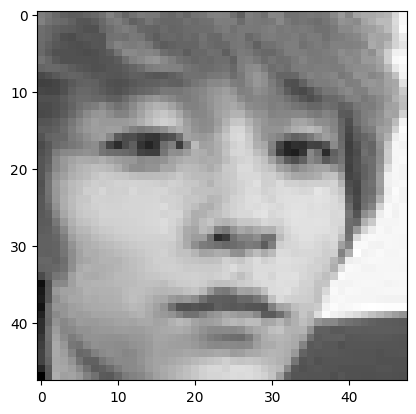

In [41]:
image = 'images/train/neutral/13.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48,48), cmap='gray')

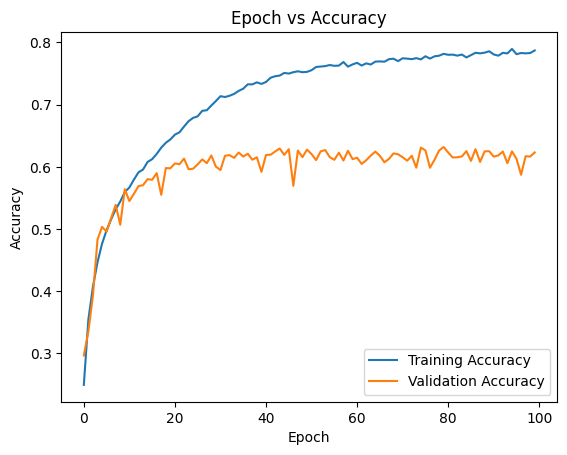

In [43]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()
